C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:42: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  main_categories_df = pd.DataFrame(main_categories_raw, dtype="int")[["CATEGORY_ID","TOPIC_TITLE_" + self.lang]]
C:\Users\user\anaconda3\lib\site-packages\evds\__init__.py:180: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data, dtype="float")


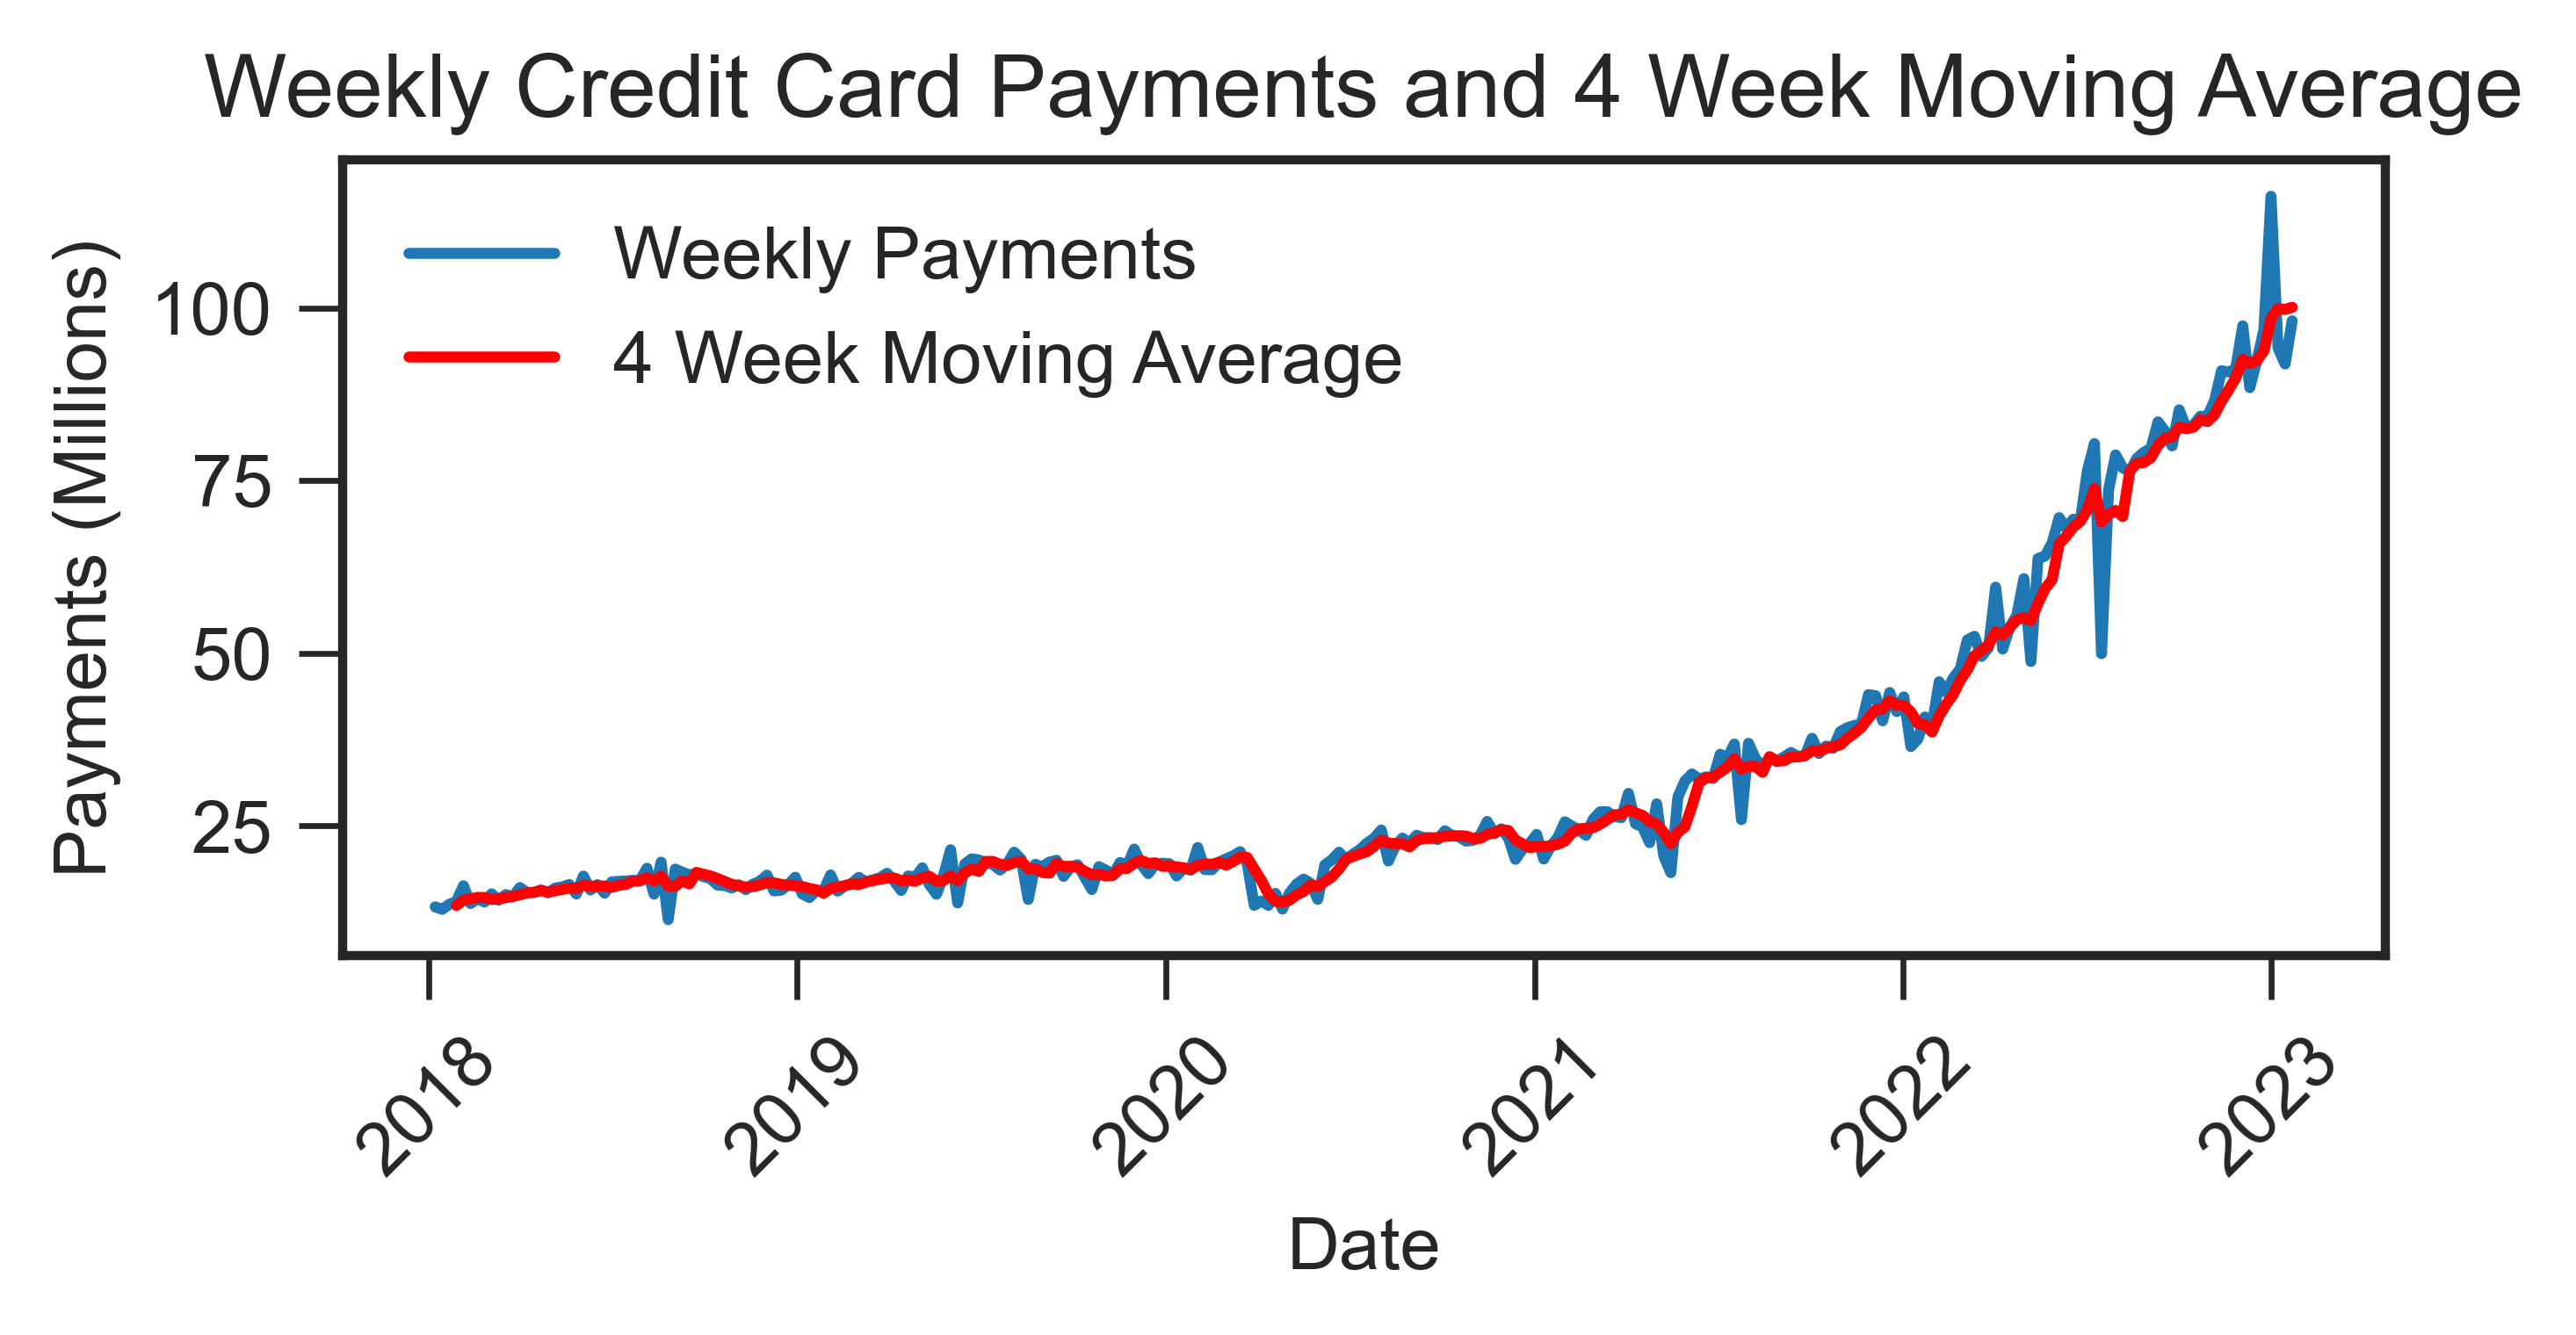

In [12]:
#Author : Alihan Ucar
from evds import evdsAPI
evds= evdsAPI('IvCWuy3TWo')
evds.main_categories


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def sma4weeks(var1, var2, sd, ed):
    
   

    # Load data and format the date column
    df = evds.get_data([var1], startdate = sd, enddate = ed)
    df['Tarih'] = pd.to_datetime(df['Tarih'], dayfirst=True)

    # Calculate the weekly sum of credit card payments
    weekly_payments = df.groupby(pd.Grouper(key='Tarih', freq='W')).sum()

    # Divide the TP_KKHARTUT_KT1 values by 1e6 to show them in millions
    weekly_payments[var2] = weekly_payments[var2] / 1e6

    # Calculate 4 week moving average
    rolling_mean = weekly_payments[var2].rolling(window=4).mean()

    # Plot the weekly payments and the 4 week moving average
    plt.plot(weekly_payments[var2], label='Weekly Payments')
    plt.plot(rolling_mean, label='4 Week Moving Average', color='red')

    # Add the title, axis labels, and legend
    plt.title('Weekly Credit Card Payments and 4 Week Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Payments (Millions)')
    plt.legend(loc='upper left')



    # Rotate the x axis dates to make them easier to read
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# You can easily change variables and apply sma function for any data that you want. Be aware that Credit Card and Bank Card payments are weekly data.
var1="TP.KKHARTUT.KT1"
var2="TP_KKHARTUT_KT1"    
sd = "01-01-2018"
ed = "30-01-2023"

sma4weeks(var1,var2,sd,ed)